Required libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install regex
!pip3 install sklearn
!pip3 install statsmodels

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import math

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
Total = []
for row in dataset.to_numpy():
    Total.append(np.sum(row[1:]))

In [4]:
x = []
for el in dataset['Date/Time']:
    match = re.match(r'^ ([0-9]{2})\/([0-9]{2})  ([0-9]{2})', el)
    x.append([int(match[2]), int(match[1]), int(match[3])])    

##Splitting the dataset into training and test sets

In [5]:
x = np.array(x)
y = np.array(Total)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

##Multiple Linear Regression

In [6]:
import statsmodels.api as sm

lin_regressor = sm.OLS(endog = y_train, exog = x_train).fit()
lin_regressor.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.568
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              2873.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:01:07   Log-Likelihood:                         -13445.
No. Observations:                6570   AIC:                                  2.690e+04
Df Residuals:                    6567   BIC:                                  2.692e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0698      0.002     31.515      0.000       0.065       0.074
x2            -0.0273      0.006     -4.938      0.000      -0.038      -0.016
x3             0.0842      0.003     30.064      0.000       0.079       0.090
==============================================================================
Omnibus:                      645.229   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              847.461
Skew:                           0.852   Prob(JB):                    9.47e-185
Kurtosis:                       3.435   Cond. No.                         5.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression parameters

In [7]:
lin_regressor.params

array([ 0.06979289, -0.02728167,  0.08423404])

Plotting the results

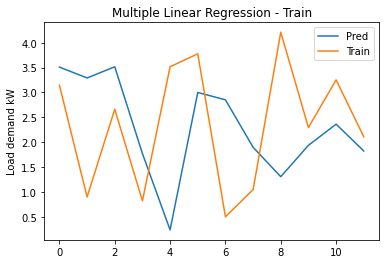

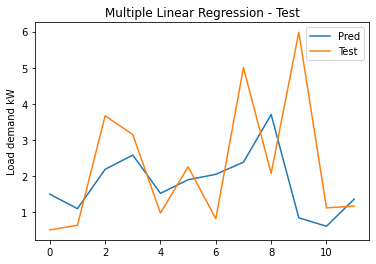

In [8]:
plt.plot(lin_regressor.predict(x_train)[:12])
plt.plot(y_train[:12])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('Multiple Linear Regression - Train')
plt.show()

y_pred = lin_regressor.predict(x_test)
plt.plot(y_pred[:12])
plt.plot(y_test[:12])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('Multiple Linear Regression - Test')
plt.show()

##Polynomial Regression

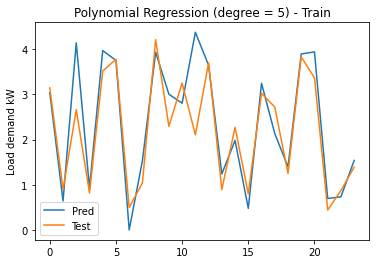

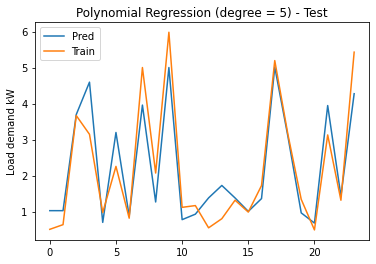

RMSE :  0.7149721106611536
R2 Score :  0.8000543984284858
Adjusted R2 Score :  0.7997799991582596


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly, y_train)

plt.plot(poly_regressor.predict(poly_reg.fit_transform(x_train))[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('Polynomial Regression (degree = 5) - Train')
plt.show()

y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('Polynomial Regression (degree = 5) - Test')
plt.show()

temp = y_pred - y_test
poly_rmse = np.sqrt(np.mean(temp * temp))
print("RMSE : ",poly_rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1]- 1)
print("Adjusted R2 Score : ", adj_r2)

##Support Vector Regression

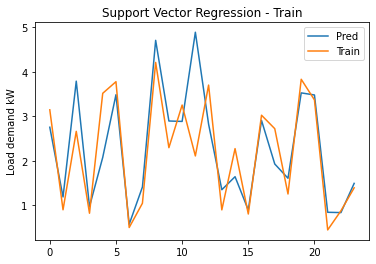

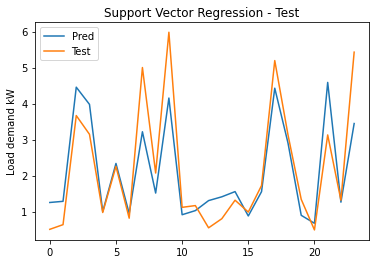

RMSE :  0.8375354937638184
R2 Score :  0.7256278072043009
Adjusted R2 Score :  0.7252512671409947


In [10]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x_train, y_train)

plt.plot(svr_regressor.predict(x_train)[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('Support Vector Regression - Train')
plt.show()

y_pred = svr_regressor.predict(x_test)
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('Support Vector Regression - Test')
plt.show()

temp = y_pred - y_test
svr_rmse = np.sqrt(np.mean(temp * temp))
print("RMSE : ",svr_rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)

##Random Forest Regression

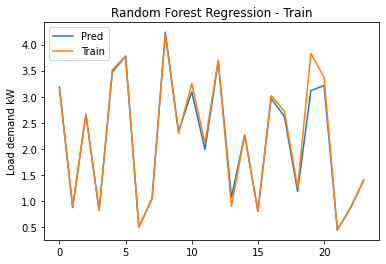

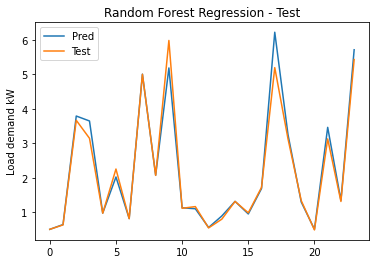

RMSE :  0.3085184415716377
R2 Score :  0.9627697536373931
Adjusted R2 Score :  0.9627186599781581


In [11]:
from sklearn.ensemble import RandomForestRegressor
rforest_regressor = RandomForestRegressor(n_estimators = 4, random_state = 0)
rforest_regressor.fit(x_train, y_train)

plt.plot(rforest_regressor.predict(x_train)[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('Random Forest Regression - Train')
plt.show()

y_pred = rforest_regressor.predict(x_test)
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('Random Forest Regression - Test')
plt.show()

temp = y_pred - y_test
rforest_rmse = np.sqrt(np.mean(temp * temp))
print("RMSE : ",rforest_rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)